## 04.

### Source-free case
* Once again, the "source-free" poisson equation is the Laplace equation.
  - Since we are (incorrectly) calling the $\nabla \cdot D=\rho(r)$ as the poisson equation, the source-free case (no net charge, $\rho(r)=0$ is not reduced to the Laplace equation.
  - Instead, (under the electrostatic approximation)
    $$\nabla \cdot [\epsilon(r)\nabla \phi(r)]=0 $$
  - In the 1D structure,
    $$\frac{d}{dx}\left[\epsilon(x)\frac{d}{dx}\phi(x) \right]=0$$
### Comparison
* Laplace equation
  $$\frac{d}{dx}\left[\frac{d}{dx}\phi(x) \right]=0$$
* (Generalized) Poisson equation with the source-free condition
  $$\frac{d}{dx}\left[\epsilon(x)\frac{d}{dx}\phi(x) \right]=0$$
  - They look quite similr. However, they are not.
### Two capacitors
* Capacitor made of a single dielectric layer
  - Its thickness is 5nm. Its relative permittivity is 11.7.
* Capacitor made of two dielectric layers
  - Each of them is 2.5nm thick. Their relative permittivity is 11.7 and 3.9, respectively.
### Discretization
* How to treat the position-dependent permittivity
  - For $2 \le i \le N-1$, the integration from $x_{i-0.5}$ to $x_{i+0.5}$yields
    $$\left.\epsilon(x_{i+0.5})\frac{d\phi}{dx}\right|_{x_{i+0.5}} - \left.\epsilon(x_{i-0.5})\frac{d\phi}{dx}\right|_{x_{i-0.5}} = 0$$
  - The first derivative is approximated by
    $$\left.\frac{d\phi}{dx} \right|_{x_{i+0.5}} \approx \frac{\phi_{i+1}-\phi_i}{x_{i+1}-x_i} $$
### N=5 example
* At x3, two layers($\epsilon_1=11.7\epsilon_0$ and $\epsilon_2=3.9\epsilon_0$) meet.
  - It is simply given by
$$Ax = 
\begin{bmatrix}
\textcolor{red}{1} & 0 & 0 & 0 & 0 \\
\textcolor{red}{\epsilon_1} & \textcolor{red}{-2\epsilon_1} & \textcolor{red}{\epsilon_1} & 0 & 0 \\
0 & \textcolor{red}{\epsilon_1} & \textcolor{red}{-\epsilon_1-\epsilon_2} & \textcolor{red}{\epsilon_2} & 0 \\
0 & 0 & \textcolor{red}{\epsilon_2} & \textcolor{red}{-2\epsilon_2} & \textcolor{red}{\epsilon_2} \\
0 & 0 & 0 & 0 & \textcolor{red}{1} 
\end{bmatrix}
\begin{bmatrix}
\phi(x_1) \\ \phi(x_2) \\ \phi(x_3) \\ \phi(x_4) \\ \phi(x_5)
\end{bmatrix}
=
\begin{bmatrix}
0 \\ 0 \\ 0 \\ 0 \\ \textcolor{red}{1}
\end{bmatrix}
=
b
$$ 
 - Note that the third row has different coefficients.
 - When $\epsilon_1=\epsilon_2$, it is reduced to the Laplace equation.
### Python example
* Step-by-steyp procedure
  - First, set the matrix, A.
  - Next, set the vector, b.
  - Finally, get the solution vector x.
### Problem
 - Consider a heterostructure. It has two layers. Thickness of the SiO2 layer is 0.5nm. Its relative permittivity is 3.9. A 1.9nm-thihck HfO2 layer is followed. Its relative permittivity is 22.0.
 - Ignore mobile carriers.
 - Then, calculate the capacitance per area.(F/cm2)
 - Compare your result with the analytic expression.


### Numerical
$$\frac{d}{dx}\left[\epsilon(x)\frac{d}{dx}\phi(x) \right]=b(x)$$
$$\epsilon(x)=
\begin{cases}
\epsilon_1, & 0 \le xsio < d \\
\epsilon_2, & d \le xhfo < L
\end{cases}
$$
* By finite difference (Continous x $\rightarrow$ {x1,x2, . . . xN}
$$\frac{d}{dx}\left[\epsilon(x)\frac{d}{dx} \right] \Rightarrow A$$
$$b(x)=(0,0,\cdots, 1)^T $$
$$\phi(x)=(\phi_1,\phi_2,\cdots, \phi_N)^T $$

### Exact solution
* Exact solution for $d=\frac{sio5}{sio5+hfo19=24}*L$ and $\phi(0)=0$, $\phi(L)=1$   
$$\phi(x)=
\begin{cases}
\frac{C_n}{\epsilon_1}x, & for \quad 0 \le xsio < d \\
\frac{C_n}{\epsilon_2}x + \frac{1/\epsilon_1 - 1/\epsilon_2}{1/\epsilon_1+19/(5\epsilon_2)}, & for \quad d \le xhfo < L
\end{cases}$$
 - Where
$$C_n=\frac{1}{\frac{d}{\epsilon_1}+\frac{L-d}{\epsilon_2}} $$
 - Capacitance/area, $C/A=1/\left(\frac{d}{\epsilon_1}+\frac{L-d}{\epsilon_2}\right) $ that is the same with Cn

* Numerically, We can take C/A by slope of $\phi(x)$, C=epsilon*A/d, Q=CV
$$C/A=\epsilon_1 \frac{\Delta \phi_1(x)}{\Delta x}=\epsilon_2 \frac{\Delta \phi_2(x)}{\Delta x}$$
 - Where
   $\phi_1(x)=\phi(0\le x <d),\quad \phi_2(x)=\phi(d\le x <L) $
#### New2
  $\phi(x\le0.5um)=(2200/1841) x $, $\phi(0.5\le x<2.4)=(390/1841)x+(905/1841) $   
  plus, we must note that the slope is related with the capacitance as $C/\epsilon_1=(2200/1841),\quad C/\epsilon_2=(390/1841)$.


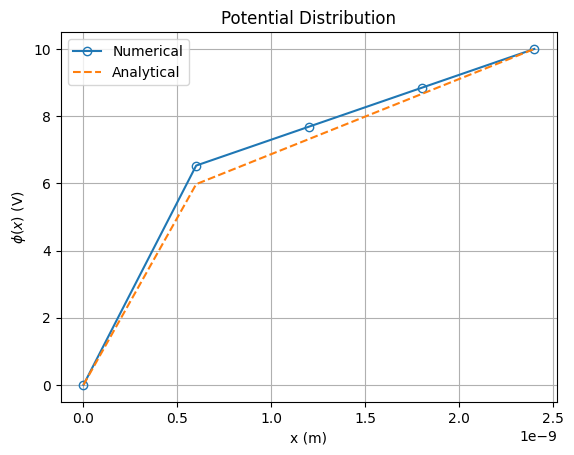

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
tsio = 0.5e-9  # Length for silicon oxide, m
thfo = 1.9e-9  # Length for hafnium oxide, m
a = tsio + thfo  # Full length, m
N = 5
dx = a / (N - 1)
esio = 3.9
ehfo = 22.0  # Relative permittivity
e0 = 8.854187817e-12  # Vacuum permittivity, F/m
interface = round(tsio / dx)  # Interface
Vappl = 10

# Initialize matrices and vectors
A = np.zeros((N, N))
b = np.zeros((N,1))
b[-1] = Vappl

# Fill matrix A
for ii in range(N):
    if ii == 0 or ii == N - 1:  # Boundary conditions
        A[ii, ii] = 1
    elif ii < interface:  # Silicon oxide region
        A[ii, ii - 1] = esio; A[ii, ii] = -2 * esio;    A[ii, ii + 1] = esio
    elif ii == interface:  # Interface
        A[ii, ii - 1] = esio; A[ii, ii] = -esio - ehfo; A[ii, ii + 1] = ehfo
    elif ii > interface:  # Hafnium oxide region
        A[ii, ii - 1] = ehfo; A[ii, ii] = -2 * ehfo;    A[ii, ii + 1] = ehfo
    
# Solve for potential
phi = np.linalg.solve(A, b)

#### Numerical ####
x = np.linspace(0, a, N)

#### Analytical ####
x1 = np.linspace(0, tsio, round(tsio / dx))
x2 = np.linspace(tsio, a, N - len(x1))
phi1_analytic = Vappl / (tsio + thfo * (esio / ehfo)) * x1
phi2_analytic = Vappl / ((ehfo / esio) * tsio + thfo) * (x2 - a) + Vappl
phi_analytic = np.concatenate([phi1_analytic, phi2_analytic])
phi_analytic = phi_analytic[:N]  # 크기 맞추기

# Plot potential
plt.plot(x, phi, "o-", mfc="none", label="Numerical")
plt.plot(x, phi_analytic, "--", label="Analytical")
plt.xlabel("x (m)"), plt.ylabel(r"$\phi(x)$ (V)"), plt.title("Potential Distribution")
plt.legend(), plt.grid(True)
plt.show()

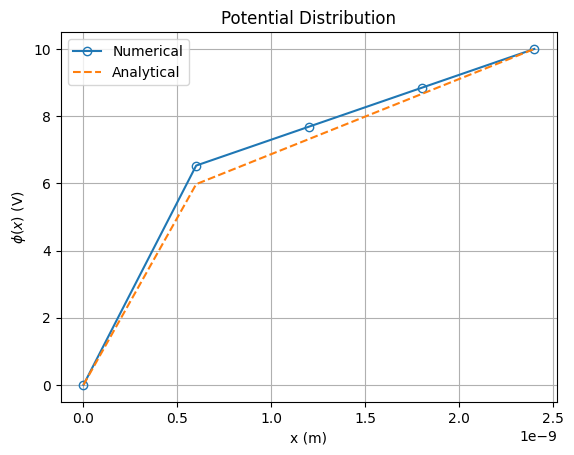

N: 5
C_anal: 0.04126503610530147
C_num: 0.03757118272495546
Error(%):  8.951533135509473


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
t1 = 0.5e-9  # Length for silicon oxide, m
t2 = 1.9e-9  # Length for hafnium oxide, m
a = t1 + t2  # Full length, m
N = 5
dx = a / (N - 1)
e1 = 3.9
e2 = 22.0  # Relative permittivity
e0 = 8.854187817e-12  # Vacuum permittivity, F/m
interface = round(t1 / dx)  # Interface
Vappl = 10

def build_matrix_SH_system(N,a,e1,e2): #SiO2-HfO2 system
    # Initialize matrices and vectors
    A = np.zeros((N, N))
    b = np.zeros((N,1))
    b[-1] = Vappl
    
    # Fill matrix A
    for ii in range(N):
        if ii == 0 or ii == N - 1:  # Boundary conditions
            A[ii, ii] = 1
        elif ii < interface:  # Silicon oxide region
            A[ii, ii - 1] = e1; A[ii, ii] = -2 * e1;    A[ii, ii + 1] = e1
        elif ii == interface:  # Interface
            A[ii, ii - 1] = e1; A[ii, ii] = -e1 - e2; A[ii, ii + 1] = e2
        elif ii > interface:  # Hafnium oxide region
            A[ii, ii - 1] = e2; A[ii, ii] = -2 * e2;    A[ii, ii + 1] = e2
    return A, b

#def solve_potential(N, a, e1, e2):
#    A, b = build_matrix_SHS_system(N, a, e1, e2)
#    phi = np.linalg.solve(A, b)
#    return phi
#phi = solve_potential(N,a,e1,e2)  # 홀수okay.

#### Numerical ####
A, b = build_matrix_SH_system(N, a, e1, e2)
phi = np.linalg.solve(A, b)

x = np.linspace(0, a, N)

#### Analytical ####
x1 = np.linspace(0, t1, round(t1 / dx))
x2 = np.linspace(t1, a, N - len(x1))
phi1_analytic = Vappl / (t1 + t2 * (e1 / e2)) * x1
phi2_analytic = Vappl / ((e2 / e1) * t1 + t2) * (x2 - a) + Vappl
phi_analytic = np.concatenate([phi1_analytic, phi2_analytic])
#phi_analytic = np.hstack([phi1_analytic, phi2_analytic])
phi_analytic = phi_analytic[:N]  # 크기 맞추기

# Plot potential
plt.plot(x, phi, "o-", mfc="none",label="Numerical")
plt.plot(x, phi_analytic, "--", label="Analytical")
plt.xlabel("x (m)"), plt.ylabel(r"$\phi(x)$ (V)"), plt.title("Potential Distribution")
plt.legend(), plt.grid(True)
plt.show()

#### Analytical ####
print("N:",N)
#C_anal = 1e9*e0*e1*2200/1841
c1_anal = e1 * e0 / t1
c2_anal = e2 * e0 / t2
C_anal = 1 / (1 / c1_anal + 1 / c2_anal)
print("C_anal:",C_anal)

#### Numerical ####
dy_1 = phi[1]
slope1 = dy_1/dx
C_num=slope1*e1*e0*0.1
print("C_num:", C_num[0])

Error = np.abs(C_anal - C_num[0])/C_anal * 100
print("Error(%): ",Error)

#### New3
* By solving Ax=b equation, electrostatic potential is given. With this potential we can get Displacement by equation below.
$$D \approx -\epsilon(x) \frac{\phi_i - \phi_{i-1}}{\Delta x} $$
* Capacitance can be obtained using Displacement field. $\rho_s$ is surface charge(C/cm2)   
  $D(0^+)=\rho_s(0^+) $   
  $D(L^-)=-\rho_s(L^-)$   
  $CV=Q-A\int \rho dx=D(L^-) \quad (unit\ of\ C\ is \frac{F}{cm^2})$   
  $C=\frac{D}{V}$
* Analytic expression
  - Exact solution of potential should be obtained to compare with numerical solution.
$$V(x)=
\begin{cases}
Ax, & \quad 0 \le xsio < 0.5nm \\
C(x-1.9nm)+V_{applied}, & \quad 0.5nm \le xhfo < 2.4nm
\end{cases}$$
$$D(0\le x <0.5nm) = \epsilon_{sio2}A=D(0.5nm \le x < 2.4nm)=\epsilon_{hfo2}C $$
$$V(x=0.5nm)=A \times 0.5nm = C(0.5nm-1.9nm)+V_{applied} $$
$$V(x)=
\begin{cases}
\frac{V_{applied}}{0.5nm+\frac{\epsilon_{sio2}}{\epsilon_{hfo2}}2.4nm} x &, \quad 0 \le xsio < 0.5nm \\
\frac{V_{applied}}{\frac{\epsilon_{sio2}}{\epsilon_{hfo2}}0.5nm+2.4nm}(x-2.4nm)+V_{applied} &, \quad 0.5nm \le xhfo < 2.4nm
\end{cases}$$
 - Capacitor with two dielectrics can be calculated separately, for each of them
 - They are calculated in <span style="color:red">series connection </span>.
$$\frac{1}{C_{total}}=\frac{1}{C_{sio2}} + \frac{1}{C_{hfo2}} $$
$$C_{sio2}=\frac{\epsilon_{sio2}}{t_{sio2}} \quad, C_{hfo2}=\frac{\epsilon_{hfo2}}{t_{hfo2}}$$

### Displacement field란 무엇인가?
아래의 displacement field matrix는 전기장과 전하밀도 간의 관계를 설명하는 변위 전기장 $D$를 계산하기 위해 정의된 행렬. 이를 통해 변위 전기장을 수치적으로 계산하고, 전기용량을 추정할 수 있다.\
Displacement field란 무엇인가?
변위 전기장은 전기장의 효과와 물질 내 분극을 모두 고려한 전기장의 확장 걔념이다. \
$$D=\epsilon_0E+P$$
D:변위전기장(C/m^2), $\epsilon_0$:진공유전율, E:전기장, P:분극벡터\
특히 선형물질에서는 $P=\chi_e\epsilon_0E$이므로, $D=\epsilon E$ \
$\epsilon = \epsilon_0 \epsilon_r$\
주어진 전위$\phi(x)$로부터 변위전기장 계산, 이를 기반으로 축적된 전하밀도 또는 전기용량 계산\
$$D=-\epsilon\frac{d\phi}{dx}$$
DP_A@phi : 변위 전기장의 값(전위를 공간적으로 미분하여 얻음)\
Vapplied : 변위 전기장을 정규화하기 위해 사용(단위 전압 기준)\
**축적 전하밀도 계산**\
$$Q=\int_{}^{}D\cdot dA$$
여기서, Displacement[0]은 전하 밀도의 근사값으로 사용된다.\
$C=Q/V$로 정의된다. 코드에서 C는 변위 전기장을 기반으로 계산된다. C=-Displacement[0,0]

In [80]:
# 안필헌
# Displacement field matrix
import numpy as np
import matplotlib.pyplot as plt

DP_A = np.zeros((N, N))
for ii in range(N):
    if ii == 0:  # First point
        DP_A[ii, ii] = -e1 * e0 / dx
        DP_A[ii, ii + 1] = e1 * e0 / dx
    elif ii == interface:  # Interface
        DP_A[ii, ii] = e1 * e0 / dx
        DP_A[ii, ii - 1] = -e1 * e0 / dx
    elif ii == N - 1:  # Last point
        DP_A[ii, ii] = e2 * e0 / dx
        DP_A[ii, ii - 1] = -e2 * e0 / dx
    elif ii < interface:  # Silicon oxide region
        DP_A[ii, ii] = -e1 * e0 / dx
        DP_A[ii, ii + 1] = e1 * e0 / dx
    elif ii > interface:  # Hafnium oxide region
        DP_A[ii, ii] = e2 * e0 / dx
        DP_A[ii, ii - 1] = -e2 * e0 / dx
#print(DP_A)
# Displacement and capacitance
Displacement = (-DP_A @ phi) / Vappl / 1e4  # Convert to cm^-2
C = -Displacement[0]

# Analytical capacitance
analytical_c1 = e1 * e0 / t1 / 1e4  # Convert to cm^-2
analytical_c2 = e2 * e0 / t2 / 1e4  # Convert to cm^-2
analytical_C = 1 / (1 / analytical_c1 + 1 / analytical_c2)

# Error calculation
Error = abs(analytical_C - C[0]) / analytical_C * 100

print(analytical_C)
print(C[0])
print("Error(%): ",Error)

4.126503610530146e-06
3.757118272495559e-06
Error(%):  8.951533135509132


In [96]:
# 박누리
C_anal = 1e9*e0*e1*2200/1841
print("C_anal:",C_anal)

phi = np.linalg.solve(A, b)
dy_1 = phi[1]
slope1 = dy_1/dx
C_num=slope1*e1*e0*0.1
print("N:",N)
print("C_num:", C_num[0])

Error = np.abs(C_anal - C_num[0])/C_anal * 100
print("Error(%): ",Error)

C_anal: 0.04126503610530147
N: 5
C_num: 0.03757118272495546
Error(%):  8.951533135509473


In [93]:
# 김지철
C_anal=e0/(5/(24*e1)+19/(24*e2))/a
print("C_anal: ",C_anal)
C_numer=e1*e0*24*phi[interface]/(5*a)*0.1
print("C_numer: ",C_numer[0])
C_diff = C_anal - C_numer[0]
print("C_diff: ",C_diff)
Error = np.abs(C_anal - C_numer[0])/C_anal * 100
print("Error(%): ",Error)

C_anal:  0.04126503610530147
C_numer:  0.04508541926994655
C_diff:  -0.003820383164645086
Error(%):  9.258160237388639
